In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Macro = pd.read_csv('drive/My Drive/Mita_thesis/mita_thesis/Macro_ecn.csv' , index_col=0)
Yield = pd.read_csv('drive/My Drive/Mita_thesis/mita_thesis/bond_yield_add.csv' , index_col=0)
#ここもしかしたらいらないかも？
Macro.index = pd.date_range('1980-1-1', periods=Macro.shape[0], freq='M')
Yield.index = pd.date_range('1980-1-1', periods=Yield.shape[0],freq='M')

## 基本統計量及びグラフの確認

In [ ]:
#説明変数
Macro.describe()

,R_PCE,R_DPI,SR,HUS,IPI_M,CUR_M,ISM_M,MIC_I,MIC_E,T_PCEIX,C_PCEIX,C_CPI,C_CPI_INF,NFE,UR,MB,M2,R_EFCR,SP500,SPR_1TNFF,SPR_5TNFF,SPR_10TNFF
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,4.830000e+02,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,8389.615636,9378.782487,7.354037,1351.231884,80.541118,77.298509,1.840994,3.328157,87.050932,2.750104,2.776832,176.915735,3.318197,122050.428571,6.184058,1.206222e+06,6107.945549,100.190850,1014.829938,0.042319,0.898468,1.353354
std,2751.995620,2983.060270,2.210490,388.465852,21.524185,4.140114,5.764732,1.313840,12.433034,2.049703,1.871144,52.096772,2.299376,17974.724002,1.691170,1.296805e+06,3867.467744,9.607362,760.730488,0.659591,1.266712,1.548050
min,4125.303008,4840.608000,2.200000,478.000000,42.878000,63.470000,-20.600000,0.400000,51.700000,-1.240000,0.900000,76.600000,0.634345,88771.000000,3.500000,1.538960e+05,1482.700000,83.893389,102.090000,-5.000000,-6.310000,-6.510000
25%,5947.034487,6771.033500,5.950000,1099.500000,59.308000,74.910000,-0.800000,2.750000,77.550000,1.600000,1.620000,132.400000,2.057317,108319.500000,4.900000,2.927670e+05,3173.000000,92.226199,331.345000,-0.130000,0.225000,0.380000
50%,8522.520031,9342.634000,7.200000,1377.000000,89.931000,77.640000,2.400000,3.000000,90.700000,2.300000,2.040000,179.500000,2.487281,130045.000000,5.700000,5.805560e+05,4669.000000,98.886340,993.320000,0.120000,1.040000,1.530000
75%,10662.432000,11780.232000,8.600000,1628.500000,100.763000,80.170000,5.700000,3.300000,95.500000,3.430000,3.515000,220.900000,4.149097,135346.000000,7.300000,1.993981e+06,8493.850000,106.258531,1382.455000,0.355000,1.715000,2.450000
max,13485.240000,15202.197000,13.200000,2273.000000,108.586000,85.410000,19.900000,10.400000,112.000000,11.590000,9.770000,267.300000,13.585434,152442.000000,10.800000,4.075039e+06,16103.700000,131.510282,3230.780000,1.690000,3.160000,3.850000


In [ ]:
#説明変数
Yield.describe()

,FF,1Y,2Y,5Y,10Y,20Y
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,4.648489,4.690807,5.012961,5.546957,6.001843,6.375435
std,4.045895,3.805075,3.799548,3.570723,3.320912,3.121118
min,0.070000,0.100000,0.210000,0.590000,0.870000,1.260000
25%,1.155000,1.325000,1.615000,2.470000,3.360000,4.165000
50%,4.630000,4.530000,4.730000,5.080000,5.360000,5.870000
75%,6.635000,6.690000,7.180000,7.740000,8.020000,8.120000
max,19.100000,16.720000,16.460000,15.930000,15.320000,15.130000


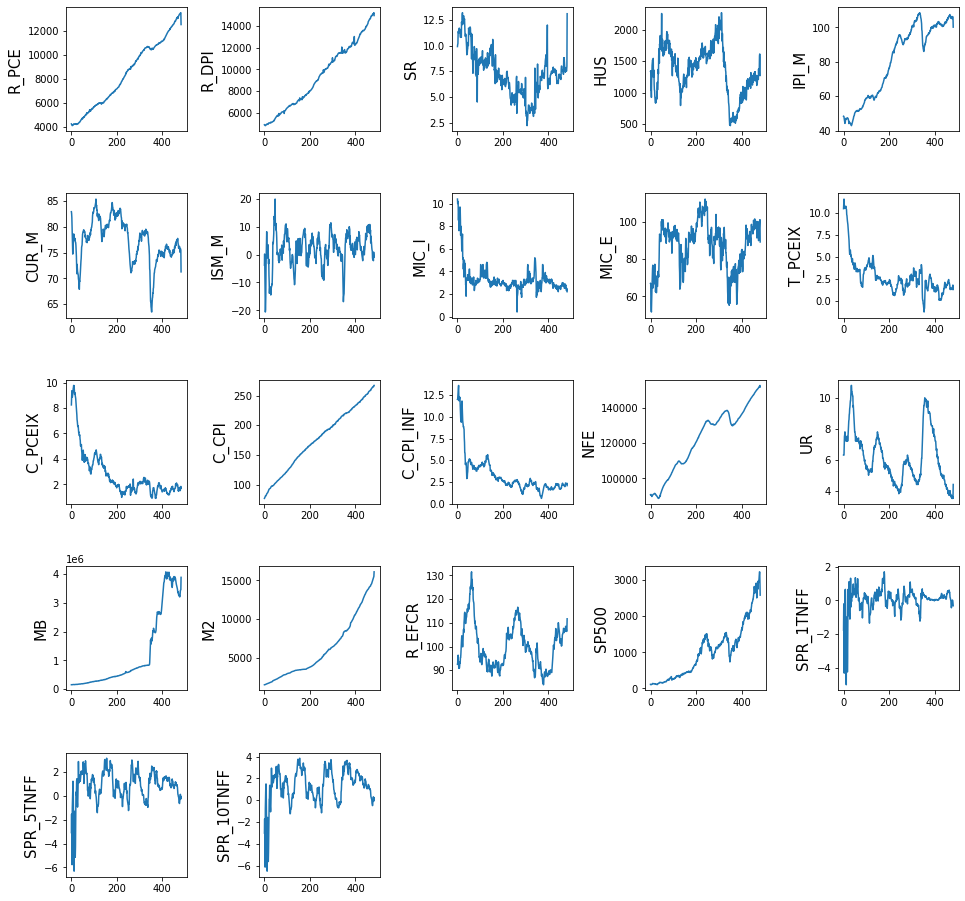

In [ ]:
#説明変数(Macro変数)描画（時系列では同じだから）
fig = plt.figure(figsize=(16,16),facecolor='w')
fig.subplots_adjust(hspace=0.5, wspace=0.6)


for i in range(22):
  plt.subplot(5,5,i+1)
  plt.plot(Macro.iloc[:,i].values)
  plt.ylabel(Macro.columns[i],fontsize=15)

fig.savefig('graph.png')

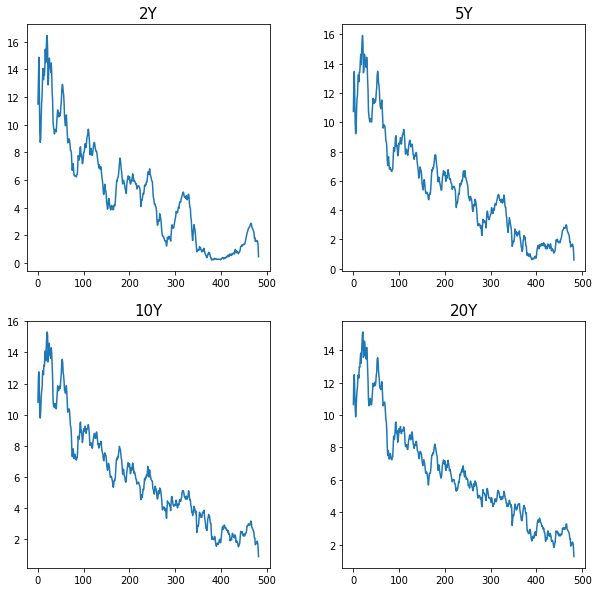

In [ ]:
#国債利回りのグラフの描画
fig = plt.figure(figsize=(10,10),facecolor='w')
fig.subplots_adjust(wspace=0.3)



for i in range(4):
  plt.subplot(2,2,i+1)
  plt.plot(Yield.iloc[:,2+i].values)
  plt.title(Yield.columns[2+i],fontsize=15)

fig.savefig('yield.png')

## 前処理

In [ ]:
#10年国債の利回りを予測する
#訓練データに10年国債利回りの値を追加
A=Yield.iloc[:,1]
Dataset=pd.concat([Macro,A],axis=1)
#Dataset.head()

In [ ]:
#X,Yデータの準備
#今回は1ヶ月先の10年国債の利回りを予測する
X=Dataset.iloc[:-1]
#X=Macro.iloc[:-1](マクロ経済変数のみ)
Y=Yield.iloc[1:,[1]]
print(X.shape,Y.shape)

(482, 23) (482, 1)


In [ ]:
#3ヶ月先の10年国債の利回り
#X=Dataset.iloc[:-3]
#Y=Yield.iloc[3:,[3]]
#print(X.shape,Y.shape)

In [ ]:
X.head()

,R_PCE,R_DPI,SR,HUS,IPI_M,CUR_M,ISM_M,MIC_I,MIC_E,T_PCEIX,C_PCEIX,C_CPI,C_CPI_INF,NFE,UR,MB,M2,R_EFCR,SP500,SPR_1TNFF,SPR_5TNFF,SPR_10TNFF,1Y
1980-01-31,4267.292621,4920.821,9.9,1341,48.363,82.96,-3.8,10.4,67.0,10.50,8.24,76.6,11.988304,90800,6.3,155995,1482.7,92.549453,114.16,-1.76,-3.08,-3.02,12.06
1980-02-29,4233.425220,4894.400,10.1,1350,48.271,82.61,0.2,10.0,66.9,11.10,8.97,77.3,12.028986,90883,6.3,153896,1494.6,93.113352,113.66,-0.21,-1.53,-1.72,13.92
1980-03-31,4199.826607,4863.703,10.2,1047,47.917,81.82,-6.4,10.2,56.5,11.59,9.35,78.3,12.500000,90994,6.3,155032,1499.8,95.766819,102.09,-1.37,-3.72,-4.44,15.82
1980-04-30,4145.929523,4858.439,11.3,1051,46.881,79.87,-12.6,10.1,52.7,11.02,8.90,79.3,12.962963,90849,6.9,157858,1502.2,96.369334,106.29,-4.31,-5.77,-6.14,13.30
1980-05-31,4125.303008,4840.608,11.4,927,45.424,77.20,-20.6,8.6,51.7,10.74,8.84,80.2,13.276836,90420,7.5,157915,1512.3,93.298714,111.24,-1.59,-1.03,-0.80,9.39


In [ ]:
Y.head()

,1Y
1980-02-29,13.92
1980-03-31,15.82
1980-04-30,13.30
1980-05-31,9.39
1980-06-30,8.16


In [ ]:
#訓練データと検証データに分割する
#一度7:3の比率でやってみる
data_split=int(Y.shape[0] * 0.7)
X_train=X[:data_split]
Y_train=Y[:data_split]
X_test=X[data_split:]
Y_test=Y[data_split:]
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(337, 23) (337, 1) (145, 23) (145, 1)


In [ ]:
#正規化の処理(一応)
X_train_nom=(X_train - X_train.min())/(X_train.max()-X_train.min())
Y_train_nom=(Y_train - Y_train.min())/(Y_train.max()-Y_train.min())
X_test_nom=(X_test - X_train.min())/(X_train.max()-X_train.min())
Y_test_nom=(Y_test - Y_train.min())/(Y_train.max()-Y_train.min())

In [ ]:
#正規化後描画する
#fig = plt.figure(figsize=(16,16),facecolor='w')
#fig.subplots_adjust(hspace=0.5, wspace=0.5)


#for i in range(23):
#  plt.subplot(5,5,i+1)
#  plt.plot(X_train_nom.iloc[:,i].values)
#  plt.ylabel(X_train_nom.columns[i],fontsize=15)

In [ ]:
X_train_nom=X_train_nom.values.astype('f')
Y_train_nom=Y_train_nom.values.astype('f')
X_test_nom=X_test_nom.values.astype('f')
Y_test_nom=Y_test_nom.values.astype('f')

In [ ]:
X_train_nom=X_train_nom.reshape(X_train_nom.shape[0],1,X_train_nom.shape[1])
X_test_nom=X_test_nom.reshape(X_test_nom.shape[0],1,X_test_nom.shape[1])

print(X_train_nom.shape,Y_train_nom.shape,X_test_nom.shape,Y_test_nom.shape)

(337, 1, 23) (337, 1) (145, 1, 23) (145, 1)


In [ ]:
Y_train=Y_train.values.astype('f')
Y_test=Y_test.values.astype('f')

## LSTMでの予測

In [ ]:
from keras import backend as K
from keras.models import Sequential,Model
from keras.layers import Dense,Embedding,Activation,LSTM,Dropout,Conv1D,GlobalMaxPooling1D,Flatten,MaxPool1D,Conv2D,MaxPool2D
from keras.layers import RepeatVector,TimeDistributed,Bidirectional,Permute,Input,multiply,Concatenate,Lambda,GlobalAveragePooling1D
from keras.optimizers import Adam,RMSprop
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing.text import text_to_word_sequence
from keras.callbacks import EarlyStopping,ModelCheckpoint
#from gensim.models import KeyedVectors

In [ ]:
hidden_size=300
batch_size=12
n_epoch=70
#random.

In [ ]:
inp=Input(shape=(1,23))
lstm1=LSTM(hidden_size)(inp)
drop=Dropout(0.2)(lstm1)
out=Dense(1,activation='linear')(drop)
model=Model(inputs=inp,outputs=out)
#optimizer_5 = RMSprop(lr=0.001, rho=0.99, epsilon=1e-08)
#model.compile(optimizer=optimizer_5, loss='mean_squared_error',metrics=['mean_squared_error'])
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 23)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 300)               388800    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 389,101
Trainable params: 389,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mc = ModelCheckpoint(filepath='lstm3M.hdf5', monitor='val_loss', 
                     verbose=1, save_best_only=True, mode='min')

In [ ]:
#fpath = save_path + '/weights.{epoch:03d}-{loss:.2f}-{acc:.2f}-{val_loss:.2f}-{val_acc:.2f}.hdf5'
#model_ckp = ModelCheckpoint(filepath = fpath, monitor='loss', verbose=1, save_best_only=True, mode='auto', period=5)

#モデルの読み込みを行う

In [ ]:
history = model.fit(X_train_nom,Y_train_nom,callbacks=mc,
                    epochs=n_epoch,validation_data=(X_test_nom,Y_test_nom),verbose=0,batch_size=batch_size)


Epoch 00001: val_loss improved from inf to 0.03622, saving model to lstm3M.hdf5

Epoch 00002: val_loss improved from 0.03622 to 0.00271, saving model to lstm3M.hdf5

Epoch 00003: val_loss improved from 0.00271 to 0.00158, saving model to lstm3M.hdf5

Epoch 00004: val_loss improved from 0.00158 to 0.00145, saving model to lstm3M.hdf5

Epoch 00005: val_loss did not improve from 0.00145

Epoch 00006: val_loss did not improve from 0.00145

Epoch 00007: val_loss did not improve from 0.00145

Epoch 00008: val_loss did not improve from 0.00145

Epoch 00009: val_loss did not improve from 0.00145

Epoch 00010: val_loss did not improve from 0.00145

Epoch 00011: val_loss did not improve from 0.00145

Epoch 00012: val_loss did not improve from 0.00145

Epoch 00013: val_loss did not improve from 0.00145

Epoch 00014: val_loss did not improve from 0.00145

Epoch 00015: val_loss did not improve from 0.00145

Epoch 00016: val_loss did not improve from 0.00145

Epoch 00017: val_loss did not improve f

In [ ]:
def plot_history_loss(hist):
    # 損失値(Loss)の遷移のプロット
    plt.plot(hist.history['loss'],label="loss for training")
    plt.plot(hist.history['val_loss'],label="loss for validation")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()

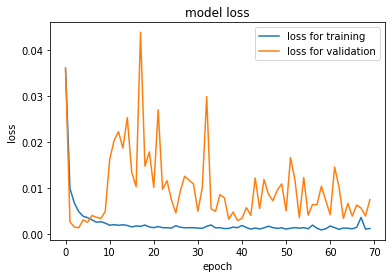

In [ ]:
plot_history_loss(history)

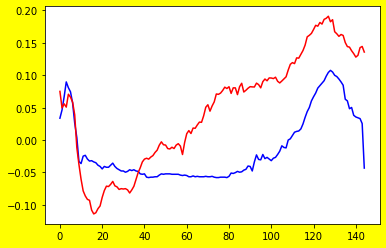

In [ ]:
y_pred = model.predict(X_test_nom)

fig=plt.figure(facecolor='yellow')
plt.plot(Y_test_nom, color='blue')  # 実測値
plt.plot(y_pred, color='red')   # 予測値
plt.show()

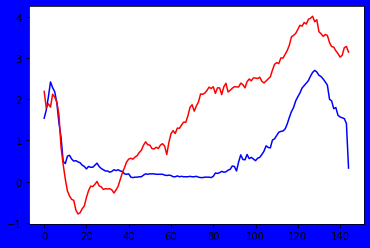

In [ ]:
Y_pred=y_pred*(Y_train.max()-Y_train.min())+Y_train.min()
fig=plt.figure(facecolor='blue')
plt.plot(Y_test,color='blue')
plt.plot(Y_pred,color='red')
plt.show()

## 利回りのみLSTM の比較

In [ ]:
#データの準備
bond_pass=X_train.iloc[:,[22]]
bond_future=X_test.iloc[:,[22]]

In [ ]:
bond_pass1=(bond_pass - bond_pass.min())/(bond_pass.max()-bond_pass.min())
bond_future1=(bond_future - bond_pass.min())/(bond_pass.max()-bond_pass.min())

In [ ]:
bond_pass1=bond_pass.values.astype('f')
bond_future1=bond_future.values.astype('f')

In [ ]:
bond_pass1=bond_pass1.reshape(bond_pass1.shape[0],1,bond_pass1.shape[1])
bond_future1=bond_future1.reshape(bond_future1.shape[0],1,bond_future1.shape[1])

In [ ]:
hidden_size=300
batch_size=12
n_epoch=70

In [ ]:
inp1=Input(shape=(1,1))
ls = LSTM(hidden_size)(inp1)
dp=Dropout(0.2)(ls)
out1=Dense(1,activation='linear')(dp)

model2=Model(inputs=inp1,outputs=out1)

model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])
model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               362400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(bond_pass1,Y_train_nom,
                    epochs=n_epoch,validation_data=(bond_future1,Y_test_nom),verbose=0,batch_size=batch_size)

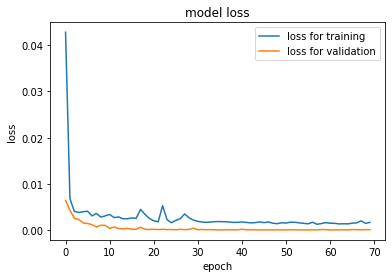

In [ ]:
plot_history_loss(history2)

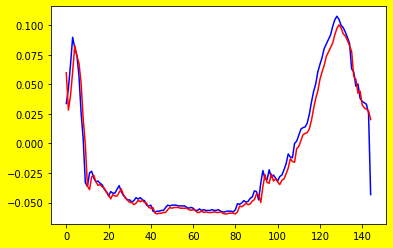

In [ ]:
y_pred = model2.predict(bond_future1)

fig=plt.figure(facecolor='yellow')
plt.plot(Y_test_nom, color='blue')  # 実測値
plt.plot(y_pred, color='red')   # 予測値
plt.show()

In [ ]:
y_pred.shape

(145, 1)

## 補足

###  正規化を全てのデータに施す

In [ ]:
#X1=(X-X.min())/(X.max()-X.min())
#Y1=(Y-Y.min())/(Y.max()-Y.min())
#Y=Y.values.astype('f')

In [ ]:
#data_split=int(Yield.shape[0] * 0.7)
#X_train=X1[:data_split]
#Y_train=Y1[:data_split]
#X_test=X1[data_split:]
#Y_test=Y1[data_split:]
#print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

In [ ]:
X_train=X_train.values.astype('f')
Y_train=Y_train.values.astype('f')
X_test=X_test.values.astype('f')
Y_test=Y_test.values.astype('f')

X_train=X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test=X_test.reshape(X_test.shape[0],1,X_test.shape[1])

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

AttributeError: ignored

In [ ]:
hidden_size=300
batch_size=12
n_epoch=70

In [ ]:
inp=Input(shape=(1,23))
lstm1=LSTM(hidden_size)(inp)
drop=Dropout(0.2)(lstm1)
out=Dense(1,activation='linear')(drop)

model1=Model(inputs=inp,outputs=out)
#optimizer_5 = RMSprop(lr=0.001, rho=0.99, epsilon=1e-08)
#model1.compile(optimizer=optimizer_5, loss='mean_squared_error',metrics=['mean_squared_error'])
adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07)
model1.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])
model1.summary()

In [ ]:
#history1= model1.fit(X_train_nom,Y_train_nom,epochs=n_epoch,validation_data=(X_test_nom,Y_test_nom),verbose=0,batch_size=batch_size)

history1= model1.fit(X_train,Y_train,epochs=n_epoch,validation_data=(X_test,Y_test),verbose=0,batch_size=batch_size)

In [ ]:
plot_history_loss(history1)

In [ ]:
y_pred = model1.predict(X_test)

fig=plt.figure(facecolor='blue')
plt.plot(Y_test,color='blue')  # 実測値
plt.plot(y_pred,color='red')   # 予測値
plt.show()

In [ ]:
Y_pred=y_pred*(Y.max()-Y.min())+Y.min()
Y2=Y_test*(Y.max()-Y.min())+Y.min()
fig = plt.figure(facecolor='yellow')
plt.plot(Y2,color='blue') #実測値
plt.plot(Y_pred,color='red') #予測値

plt.show()